# Mandelbrot set implementation according to https://de.wikipedia.org/wiki/Mandelbrot-Menge

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
""" Berechnung mit Hilfe komplexer Matrizen """

w, h = 800, 600  # Pixeldensity, width and height (original example)
w, h = 128-1, 64-1

n, r = 100, 2.5  # Max number iterations and "Fluchtradius" (r > 2) (original example)
n, r = 10, 2.5

x = np.linspace(0, 2, num=w+1)
y = np.linspace(0, 2 * h / w, num=h+1)

A, B = np.meshgrid(x - 1, y - h / w)
C = 2.0 * (A + B * 1j) - 0.5

Z = np.zeros_like(C)
T = np.zeros(C.shape)

for k in range(n):
    M = abs(Z) < r
    T[M] = T[M] + 1
    Z[M] = Z[M] ** 2 + C[M]

In [24]:
print(np.min(T ** 0.5))
print(np.max(T ** 0.5))

T_norm = T ** 0.5
T_norm = (T_norm - np.min(T_norm)) / (np.max(T_norm) - np.min(T_norm))
T_norm = T_norm.astype("int")

print(np.min(T_norm))
print(np.max(T_norm))
np.unique(T_norm)

1.0
3.1622776601683795
0
1


array([0, 1])

(-0.5, 127.5, 63.5, -0.5)

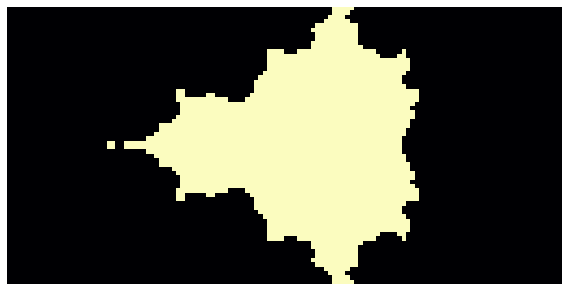

In [25]:
cmap = plt.cm.magma # plt.cm.magma_r
# cmap = plt.cm.twilight_shifted
figsize = (8, 8)

plt.figure(figsize=figsize)
plt.imshow(T ** 0.5, interpolation="nearest", cmap=cmap)  # "bicubic"
plt.axis("off")

# plt.savefig("mandelbrot_set_wiki.png", dpi=300)  # original w, h = 800x600


# T_norm
#figsize = (4, 4)
# maybe have to adjust the figsize so that output is really according to pixels???
#plt.figure(figsize=figsize)
plt.imshow(T_norm, cmap=cmap)
plt.axis("off")

#plt.savefig("mandelbrot_set_wiki_128x64.png", dpi=300)  # always saves with border around the image axis > use .imsave instead!

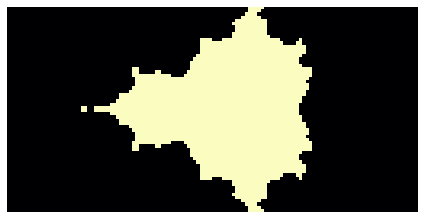

In [26]:
plt.imshow(T_norm, cmap=cmap)
plt.axis("off")

plt.imsave("mandelbrot_set_wiki_128x64_imsave.jpg", T_norm)
#mpimg.imsave(T_norm, "mandelbrot_set_wiki_128x64_imsave.png")

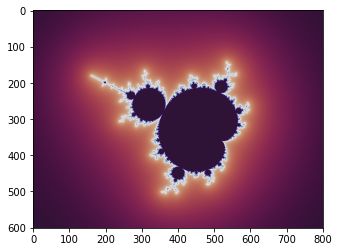

In [15]:
""" Drehstreckungen, kontinuierliche Farbverläufe und logarithmische Projektion """

import numpy as np
import matplotlib.pyplot as plt

d, h = 800, 600  # Pixeldichte (= Bildbreite) und Bildhöhe
n, r = 100, 500  # Anzahl der Iterationen und Fluchtradius (r > 2)

x = np.linspace(0, 2, num=d+1)
y = np.linspace(0, 2 * h / d, num=h+1)

A, B = np.meshgrid(x - 1, y - h / d)
C = (2.0 - 1.0j) * (A + B * 1j) - 0.5

Z, dZ = np.zeros_like(C), np.zeros_like(C)
S, T, D = np.zeros(C.shape), np.zeros(C.shape), np.zeros(C.shape)

for k in range(n):
    M = abs(Z) < r
    S[M], T[M] = S[M] + np.exp(-abs(Z[M])), T[M] + 1
    Z[M], dZ[M] = Z[M] ** 2 + C[M], 2 * Z[M] * dZ[M] + 1

plt.imshow(S ** 0.1, cmap=plt.cm.twilight_shifted)
plt.savefig("Mandelbrot_set_1.png", dpi=250)

N = abs(Z) > r  # Normalisierung der Iterationszahlen
T[N] = T[N] - np.log2(np.log(abs(Z[N])) / np.log(r))

plt.imshow(T ** 0.1, cmap=plt.cm.twilight_shifted)
plt.savefig("Mandelbrot_set_2.png", dpi=250)

N = abs(Z) > 2  # Distanzschätzung des Außenbereichs
D[N] = 0.5 * np.log(abs(Z[N])) * abs(Z[N]) / abs(dZ[N])

plt.imshow(D ** 0.1, cmap=plt.cm.twilight_shifted)
plt.savefig("Mandelbrot_set_3.png", dpi=250)

# NEXT ONE CRASHES ;-)

In [16]:
""" logarithmische Projektion und Zooms der Mandelbrotmenge """
import numpy as np
import matplotlib.pyplot as plt

d, h = 400, 2200  # Pixeldichte (= Bildbreite) und Bildhöhe
n, r = 800, 1000  # Anzahl der Iterationen und Fluchtradius (r > 2)

x = np.linspace(0, 2, num=d+1)
y = np.linspace(0, 2 * h / d, num=h+1)

A, B = np.meshgrid(x * np.pi, y * np.pi)
C = 1.5 * np.exp((A + B * 1j) * 1j) - 0.74366367740001 + 0.131863214401 * 1j

Z, dZ = np.zeros_like(C), np.zeros_like(C)
D = np.zeros(C.shape)

for k in range(n):
    M = abs(Z) < r
    Z[M], dZ[M] = Z[M] ** 2 + C[M], 2 * Z[M] * dZ[M] + 1

N = abs(Z) > 2  # Distanzschätzung des Außenbereichs
D[N] = 0.5 * np.log(abs(Z[N])) * abs(Z[N]) / abs(dZ[N])

plt.imshow(D.T ** 0.1, cmap=plt.cm.nipy_spectral)
plt.savefig("Mercator_map.png", dpi=250)

X, Y = C.real, C.imag
R = 150 * 2 / d * np.pi * np.exp(-B)  # Faktor hängt von 'figsize' ab

fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0, 0].scatter(X[0:400], Y[0:400], s=R[0:400]**2, c=D[0:400]**0.5, cmap=plt.cm.nipy_spectral)
ax[0, 1].scatter(X[100:500], Y[100:500], s=R[0:400]**2, c=D[100:500]**0.4, cmap=plt.cm.nipy_spectral)
ax[1, 0].scatter(X[200:600], Y[200:600], s=R[0:400]**2, c=D[200:600]**0.3, cmap=plt.cm.nipy_spectral)
ax[1, 1].scatter(X[300:700], Y[300:700], s=R[0:400]**2, c=D[300:700]**0.2, cmap=plt.cm.nipy_spectral)
plt.savefig("Mandelbrot_zoom.png", dpi=250)